# Sentimix Challenge
- The task is to predict the sentiment of a given code-mixed tweet. The sentiment labels are positive, negative, or neutral, and the code-mixed languages will be English-Hindi.

# Contents
This repo will cover the following things in their corresponding notebooks. 
- 1. Data Exploration and Visualization
- 2. Classic ML models for baseline
- 3. Transformer based Deep Learning models 
- 4. Evaluation Reports

In [10]:
import pandas as pd
import os
import json
from pathlib import Path
import ast

In [2]:
%load_ext autoreload
%autoreload 2

In [13]:
from utils.data_utils import process_and_split_files, plot_wordcloud

## Raw data

In [4]:
!head -n 20 ../data/train.csv

meta	3	negative
@	O
AdilNisarButt	Hin
pakistan	Hin
ka	Hin
ghra	Hin
tauq	Hin
he	Eng
Pakistan	Eng
Israel	Eng
ko	Eng
tasleem	Hin
nahein	Hin
kerta	Hin
Isko	Hin
Palestine	Hin
kehta	Hin
he	Hin
-	O
OCCUPIED	Hin


## Data Processing

In [5]:
process_and_split_files("../data/train.csv", Path("../data/"))

fullset size:  (15131, 6)  stored at:  ../data/processed_data.csv
trainset size:  (14374, 6)  stored at:  ../data/processed_train.csv
testset size:  (757, 6)  stored at:  ../data/processed_val.csv


In [6]:
data = pd.read_csv("../data/processed_data.csv")
data.head()

,id,sentiment,text,language_labels,clean_text,labels
0,3,negative,@ AdilNisarButt pakistan ka ghra tauq he Pakis...,"['O', 'Hin', 'Hin', 'Hin', 'Hin', 'Hin', 'Eng'...",mention adilnisarbutt pakistan ka ghra tauq he...,0
1,41,negative,Madarchod mulle ye mathura me Nahi dikha tha j...,"['Hin', 'Hin', 'Hin', 'Hin', 'Hin', 'Hin', 'Hi...",madarchod mulle ye mathura me nahi dikha tha j...,0
2,48,positive,@ narendramodi Manya Pradhan Mantri mahoday Sh...,"['O', 'Hin', 'Hin', 'Hin', 'Hin', 'Hin', 'Hin'...",mention narendramodi manya pradhan mantri maho...,2
3,64,positive,@ Atheist _ Krishna Jcb full trend me chal rah...,"['O', 'Eng', 'O', 'Eng', 'Eng', 'Eng', 'Eng', ...",mention atheist krishna jcb full trend me chal...,2
4,66,positive,@ AbhisharSharma _ @ RavishKumarBlog Loksabha ...,"['O', 'Hin', 'O', 'O', 'Hin', 'Eng', 'Hin', 'H...",mention abhisharsharma mention ravishkumarblog...,2


## Basic EDA

#### Distribution of Sentiment labels (tweet level)
- We can observe that all 3 labels have similar counts. The dataset is kinda balanced.

<AxesSubplot:title={'center':'Distribution of Sentiment labels (tweet level)'}>

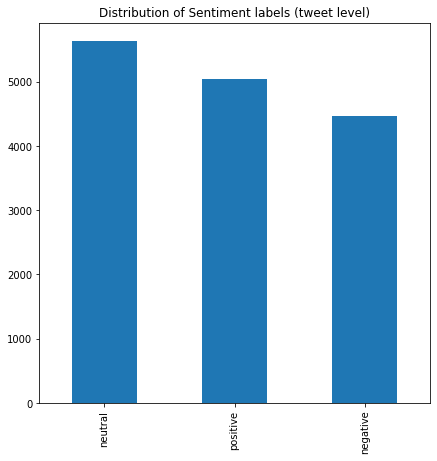

In [7]:
data.sentiment.value_counts().plot(kind='bar', title="Distribution of Sentiment labels (tweet level)", figsize=(7,7))

#### Distribution of Language labels (token level)

- Hindi tokens have a domination here. Followed by English and Other tokens.

<AxesSubplot:title={'center':'Distribution of Language labels (token level)'}>

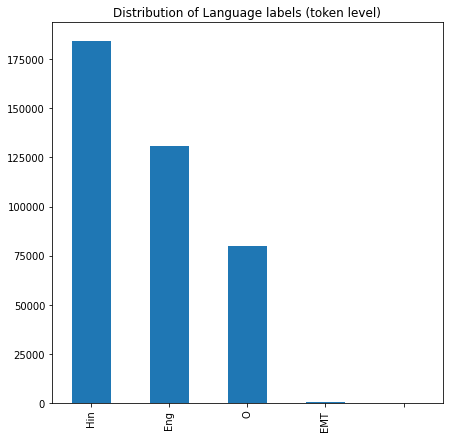

In [11]:
lang_counts = []
# data.language_labels.apply(str)
data.language_labels = data.language_labels.apply(ast.literal_eval)
data.language_labels.apply(lambda z: lang_counts.extend(z))
pd.Series(lang_counts).value_counts().plot(kind='bar', title="Distribution of Language labels (token level)", figsize=(7,7))


#### Length of tweets - (No. of tokens)

- The average Length of a tweet here is around 30 tokens.


<AxesSubplot:title={'center':'Length of tweets - (No. of tokens)'}, ylabel='Frequency'>

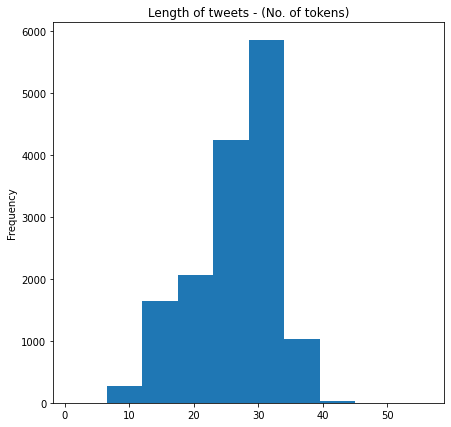

In [12]:
data.text.str.split().map(lambda x: len(x)).plot.hist(title="Length of tweets - (No. of tokens)", figsize=(7,7))

## Word cloud : All tweets

- We can observe that the tokens have a combination of both positive and negative words.
- The most common tokens include a lot of political entities, swear words, etc

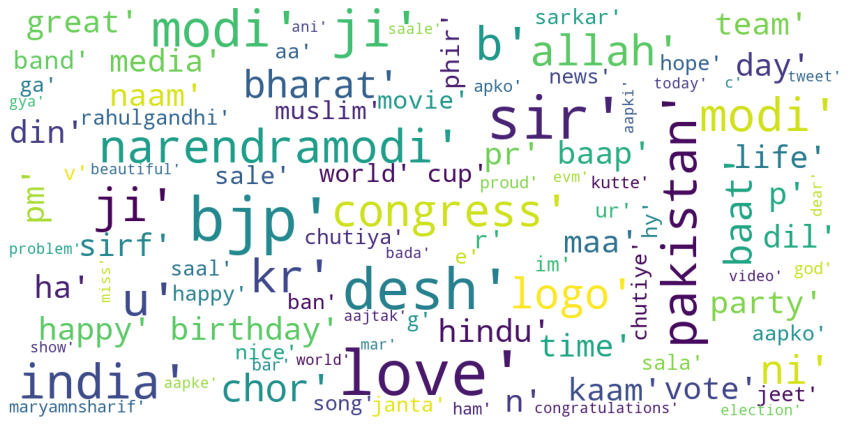

In [15]:
plot_wordcloud(data['clean_text'])

## Word cloud : Positive tweets

- Positive tweets are clearly Positive in tone :)

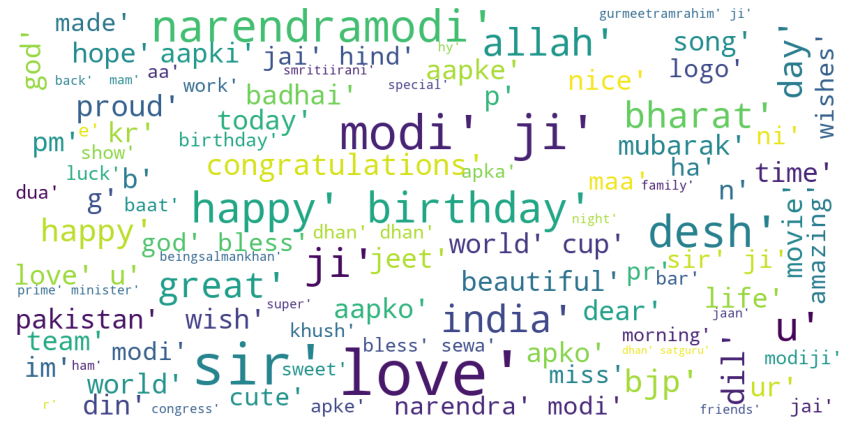

In [16]:
plot_wordcloud(data[data['sentiment']=='positive']['clean_text'])

## Word cloud : Negative tweets
- Lots of Swear words, hate speech, etc.

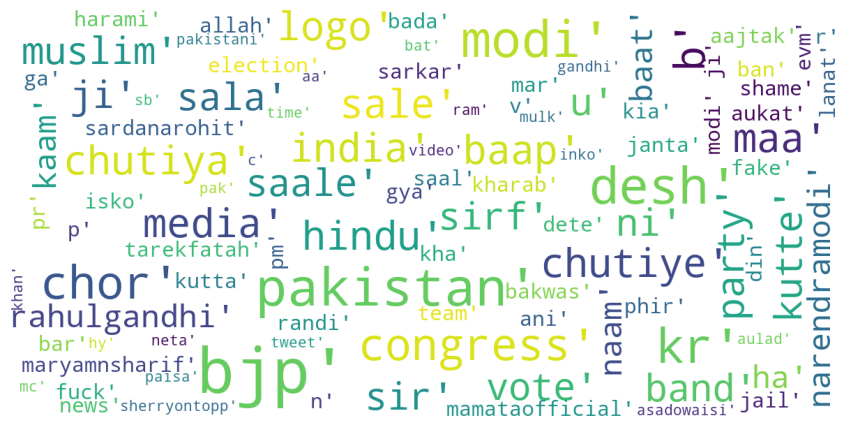

In [17]:
plot_wordcloud(data[data['sentiment']=='negative']['clean_text'])